In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


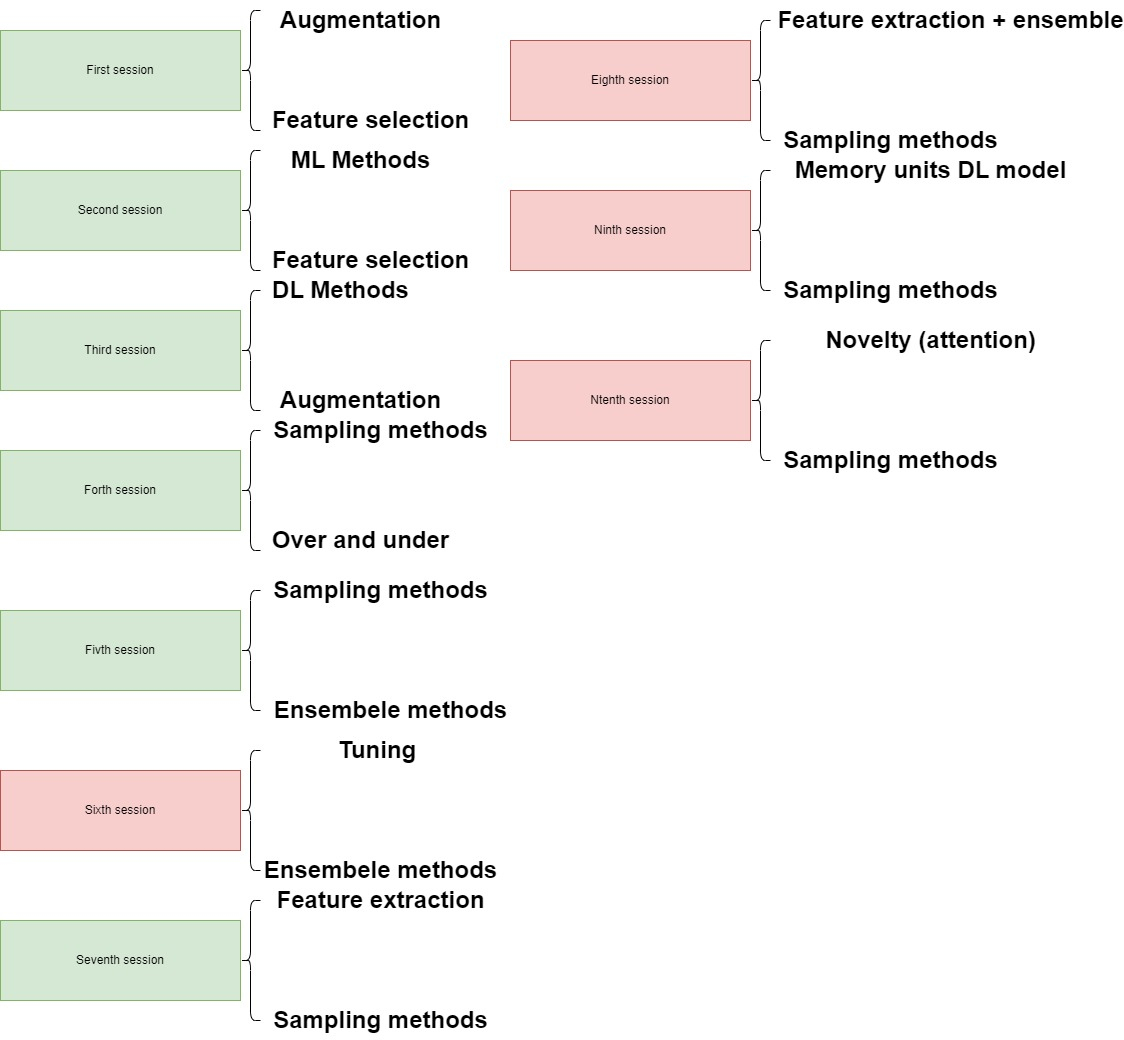

# ***Comparsion between different ANN units***

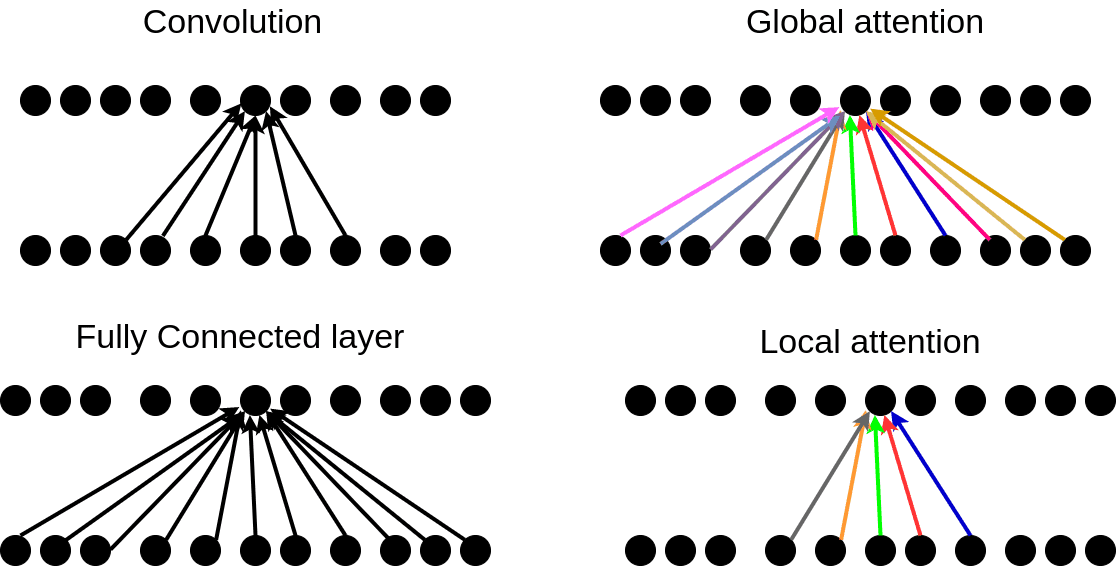

# ***Attention architectures***

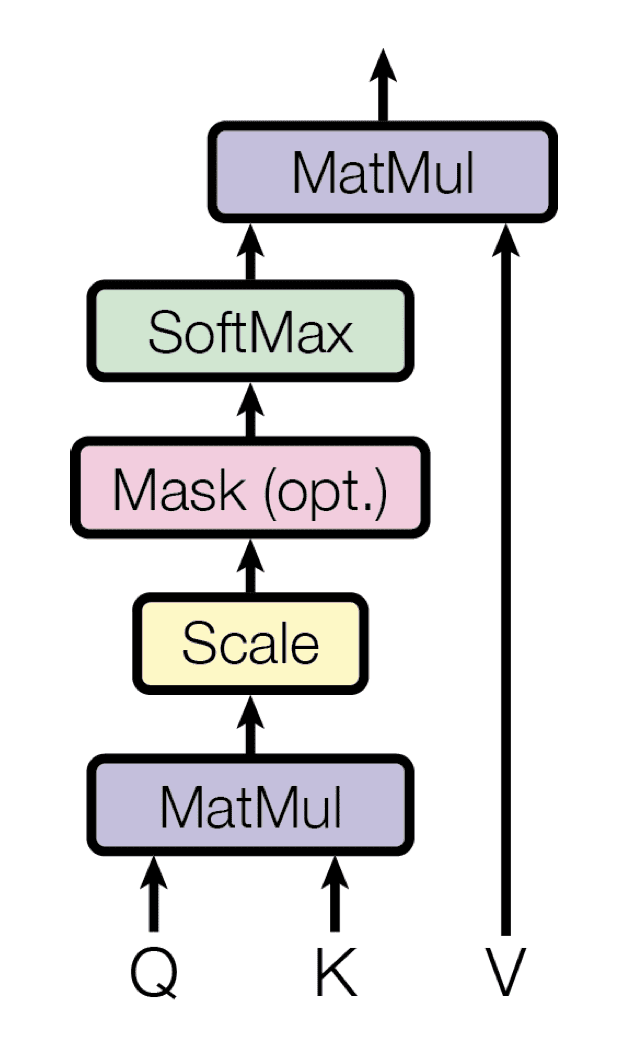

***Attention layer benefits***


1.   First it is very novel.
2.   you don't need to specify the kernel or window size.
3.   the long term memory for attention is more than 1000 words.
4.   it has short-term meory of 20
5.   it is more accurate compare to LSTM.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/full.regular.txt', delim_whitespace=True)

In [4]:
data.describe()

,0,0.000,0.000.1,0.000.2,1,1.1,1.2,1.3,1.4,0.1
count,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1079133.0
mean,1.502021e+02,5.965603e+00,7.416875e+00,9.035807e+00,1.504170e-02,7.553749e-02,2.246748e-01,8.234490e-01,2.491768e+00,0.0
std,1.267608e+02,8.436803e-01,2.182458e+00,3.029510e+00,1.221747e-01,2.767069e-01,4.954270e-01,1.201071e+00,2.386876e+00,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,5.500000e+01,5.467000e+00,5.278000e+00,6.272000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
50%,1.180000e+02,5.795000e+00,7.869000e+00,8.905000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0
75%,2.140000e+02,6.563000e+00,9.370000e+00,1.184800e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,0.0
max,1.015000e+03,7.826000e+00,1.159000e+01,1.492200e+01,2.000000e+00,4.000000e+00,6.000000e+00,1.000000e+01,1.800000e+01,0.0


In [5]:
y = data.iloc[:, 2]
X = data.iloc[:, 3:11]

In [6]:
X_samll = X.iloc[0:500000,0:]
y_samll = y.iloc[0:500000]

In [7]:
y.value_counts()

C
H    459325
C    377953
E    241855
Name: count, dtype: int64

In [8]:
target_encoding = []
for x in y_samll:
  if x == "H":
    target_encoding.append(0)
  elif x == "C":
    target_encoding.append(1)
  else:
      target_encoding.append(2)
target_encoding = np.array(target_encoding)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_samll, target_encoding)

In [10]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_samll,target_encoding)

In [11]:
X_over.shape

(600221, 8)

In [12]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X_samll, target_encoding)

In [13]:
X_sm.shape

(638187, 8)

In [14]:
X_total =pd.concat([X_over,X_sm],axis=0)
Y_total =pd.concat([pd.DataFrame(y_over),pd.DataFrame(y_sm)],axis=0)

In [15]:
X_total.shape

(1238408, 8)

In [16]:
Y_total.shape

(1238408, 1)

In [17]:
target_encoding = []
for x in np.array(y_over).ravel():
  if x == 0:
    target_encoding.append([1, 0, 0])
  elif x == 1:
    target_encoding.append([0, 1, 0])
  else:
      target_encoding.append([0, 0, 1])
target_encoding = np.array(target_encoding)

In [18]:
target_encoding.shape

(600221, 3)

In [19]:
pd.DataFrame(target_encoding).value_counts()

0  1  2
0  0  1    212729
1  0  0    212729
0  1  0    174763
Name: count, dtype: int64

In [20]:
import numpy as np
X_tensor = np.array(X_over).reshape(X_over.shape[0],X_over.shape[1],1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, target_encoding, test_size=0.20, random_state=0)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(480176, 3)
(120045, 3)
(480176, 8, 1)
(120045, 8, 1)


In [22]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Reshape, Flatten,Layer, InputSpec, \
    LSTM, Dense, Dropout, Embedding, Bidirectional, GRU,Flatten, Activation, MultiHeadAttention, \
    BatchNormalization, UpSampling2D,Conv1D, Input, Concatenate,multiply, add, \
    AveragePooling1D, UpSampling1D,Lambda, Average, Dense, Flatten,GRU,Attention
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, \
    ReduceLROnPlateau, LearningRateScheduler, CSVLogger
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import initializers, regularizers, optimizers
#from keras.engine.topology import Layer
import tensorflow as tf



***Model benefits***


*   User friendly
*   It is fast to run
*   you can use more smaples and the code won't crash
*   It is the improvement over GRU and LSTM
*   you can reach to better results with less training time
*   you can change teh architecture very easily



In [23]:
Inputs = Input((8, 1))
CONV1d_out1 = Conv1D(filters = 64, kernel_size = 7, activation='relu',padding='same')(Inputs)
CONV1d_out2 = Conv1D(filters = 64, kernel_size = 3, activation='relu',padding='same')(CONV1d_out1)
Attention_out1 = Attention()([CONV1d_out1, CONV1d_out2])
#BN_Attention_out1 = BatchNormalization()(Attention_out1)
output_tensorf = Flatten()(Attention_out1)
Dense1 = Dense(64, activation='swish', kernel_initializer=initializers.glorot_normal(seed=777), bias_initializer='zeros')(output_tensorf)
Dense2 = Dense(3, activation='softmax', kernel_initializer=initializers.glorot_normal(seed=777), bias_initializer='zeros')(Dense1)
model_Attention_CNN = Model(inputs=[Inputs], outputs=[Dense2])

In [24]:
model_Attention_CNN.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8, 1)]               0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 8, 64)                512       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 8, 64)                12352     ['conv1d[0][0]']              
                                                                                                  
 attention (Attention)       (None, 8, 64)                0         ['conv1d[0][0]',              
                                                                     'conv1d_1[0][0]']        

In [25]:
model_Attention_CNN.compile(loss="categorical_crossentropy",
 optimizer="Adam",
 metrics=["accuracy"])

In [26]:
%load_ext tensorboard

In [27]:
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
history = model_Attention_CNN.fit(X_train, y_train, epochs=1000,validation_data=(X_test, y_test),batch_size = 1028,validation_batch_size=1028, callbacks=[tensorboard_callback])

Epoch 1/1000
468/468 [==============================] - 6s 6ms/step - loss: 0.5650 - accuracy: 0.7505 - val_loss: 0.5078 - val_accuracy: 0.7808
Epoch 2/1000
468/468 [==============================] - 3s 5ms/step - loss: 0.5112 - accuracy: 0.7771 - val_loss: 0.5048 - val_accuracy: 0.7805
Epoch 3/1000
468/468 [==============================] - 2s 5ms/step - loss: 0.5045 - accuracy: 0.7806 - val_loss: 0.5004 - val_accuracy: 0.7839
Epoch 4/1000
468/468 [==============================] - 3s 7ms/step - loss: 0.4962 - accuracy: 0.7843 - val_loss: 0.4963 - val_accuracy: 0.7844
Epoch 5/1000
468/468 [==============================] - 3s 7ms/step - loss: 0.4924 - accuracy: 0.7864 - val_loss: 0.5023 - val_accuracy: 0.7836
Epoch 6/1000
468/468 [==============================] - 3s 7ms/step - loss: 0.4881 - accuracy: 0.7880 - val_loss: 0.4855 - val_accuracy: 0.7889
Epoch 7/1000
468/468 [==============================] - 2s 5ms/step - loss: 0.4823 - accuracy: 0.7904 - val_loss: 0.4751 - val_accuracy:

In [ ]:
%tensorboard --logdir logs